## SMS Spam Collection using NLP

## Description

### Context
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

### Content
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

### Acknowledgements
The original dataset can be found here. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.

### Inspiration
Can you use this dataset to build a prediction model that will accurately classify which texts are spam?

### Goal
Let's find out which texts are spam with NLP!!


### 1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

### 2.Representing text as numerical data

Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

So, we have to convert the raw text into token counts through **CountVectorizer** library.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [4]:
# Let's take a random example for model training
simple_text = ['This is Karthik','Karthik is calling you','Karthik is a good guy']

In [5]:
# Learning the vocabulary of the sample training data
vect.fit(simple_text)

CountVectorizer()

In [6]:
# Let's see the sample fitted vocabulary
vect.get_feature_names()

['calling', 'good', 'guy', 'is', 'karthik', 'this', 'you']

In [7]:
# Vocabulary label match
vect.vocabulary_

{'this': 5, 'is': 3, 'karthik': 4, 'calling': 0, 'you': 6, 'good': 1, 'guy': 2}

In [8]:
# Let's now transform this sample training data into a document-term matrix
simple_train_dtm = vect.transform(simple_text)
simple_train_dtm

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [9]:
# Coverting the sparse matrix to a dense matrix  
simple_train_dtm.toarray()

array([[0, 0, 0, 1, 1, 1, 0],
       [1, 0, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 0, 0]], dtype=int64)

### 3.Process of CountVectorizer

## 📲 process of CountVectorizer
ex - 'call you Karthik'
= ['cab', 'call', 'me', 'please', 'karthik', 'you'] </br>
= [0,1,0,0,1,1] </br>
if the word is in the sentences **return 1**  

In [10]:
# Let's check the vocabulary and Document-term matrix together
pd.DataFrame(data=simple_train_dtm.toarray(), columns=vect.get_feature_names())

,calling,good,guy,is,karthik,this,you
0,0,0,0,1,1,1,0
1,1,0,0,1,1,0,1
2,0,1,1,1,1,0,0


📌 From the scikit-learn documentation:

> In this scheme, features and samples are defined as follows:

- Each individual token occurrence frequency (normalized or not) is treated as a feature.
- The vector of all the token frequencies for a given document is considered a multivariate sample.

> A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

> We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely **ignoring the relative position information** of the words in the document.

In [11]:
# Let's see the type of the document term matrix
type(simple_train_dtm)

scipy.sparse.csr.csr_matrix

In [12]:
print(simple_train_dtm)

  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 3)	1
  (1, 4)	1
  (1, 6)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1


📌 From the scikit-learn documentation:

> As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have many feature values that are zeros (typically more than 99% of them).

> For instance, a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

> In order to be able to store such a matrix in memory but also to speed up operations, implementations will typically use a sparse representation such as the implementations available in the scipy.sparse package.

In [13]:
# example text for model testing
simple_test = ["please pick up karthik is calling"]

In order to make a prediction, the new observation must have the same features as the training observations, both in number and meaning.

In [14]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[1, 0, 0, 1, 1, 0, 0]], dtype=int64)

In [15]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

,calling,good,guy,is,karthik,this,you
0,1,0,0,1,1,0,0


## 📋 Summary:
> vect.fit(train) learns the vocabulary of the training data
vect.transform(train) uses the fitted vocabulary to build a document-term matrix from the training data
vect.transform(test) uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

### Now we will read in a text based dataset

In [16]:
sms = pd.read_csv("spam.csv",encoding='latin-1')

In [17]:
# Dropping null 
sms.dropna(how='any', inplace=True, axis=1)
sms.columns = ['label', 'message']
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### EDA

In [18]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


We have 2 unique abels:- Ham & spam

In [19]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

The dataset has 4825 ham and 747 spam records.

In [20]:
# Converting the labels to a numerical value
# Where ham-0 and spam-1

sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [21]:
# add len data 
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


### Let's visualize the distribution of both Ham & Spam messages

Text(0.5, 0, 'Message Length')

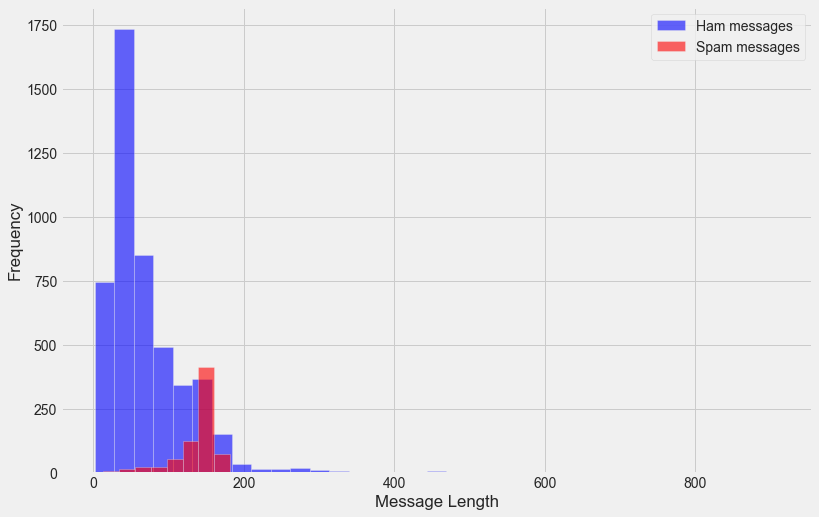

In [24]:
plt.figure(figsize=(12,8))

sms[sms.label =='ham'].message_len.plot(bins=35, kind='hist',color='blue',
                                       label='Ham messages', alpha = 0.6)

sms[sms.label =='spam'].message_len.plot(kind='hist',color='red',
                                       label='Spam messages', alpha = 0.6)

plt.legend()
plt.xlabel("Message Length")

The plot tells us that the sapm messages are usually long messages, and this might true as well considering most spam messages contain a lot of info.

In [25]:
sms[sms.label == 'ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [29]:
sms[sms.label=='ham'][sms.message_len == 910].message.iloc[0]

<ipython-input-29-7b241aef5a89>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sms[sms.label=='ham'][sms.message_len == 910].message.iloc[0]


"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [26]:
sms[sms.label == 'spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [31]:
sms[sms.label == 'spam'][sms.message_len == 224].message.iloc[0]

<ipython-input-31-b8e9c2e17782>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sms[sms.label == 'spam'][sms.message_len == 224].message.iloc[0]


'Hi, this is Mandy Sullivan calling from HOTMIX FM...you are chosen to receive å£5000.00 in our Easter Prize draw.....Please telephone 09041940223 to claim before 29/03/05 or your prize will be transferred to someone else....'

**We can clearly see the difference b/w a ham and a spam message**

## Text Pre-processing
Our main issue with our data is that it is all in text format (strings). The classification algorithms that we usally use need some sort of **numerical feature vector** in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the bag-of-words approach, where each unique word in a text will be represented by one number.

In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also **remove very common words, ('the', 'a', etc..)**. To do this we will take advantage of the **NLTK library**. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will **process the string in the message column**, then we can just use apply() in pandas do process all the text in the DataFrame.


In [37]:
import string
from nltk.corpus import stopwords ## for removing puctuating

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [38]:
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


### Now let's tokenize sms df

In [39]:
sms['clean_msg'] = sms.message.apply(text_process)

In [40]:
sms.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [41]:
type(stopwords.words('english'))

list

In [43]:
#stopwords.words('english')

In [44]:
from collections import Counter

words = sms[sms.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [45]:
words = sms[sms.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


### Vectoriaztion

Currently, we have the messages as lists of tokens (also known as lemmas) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)
2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)
m

In [47]:
# Defining X & y to use CountVectorizer on

X= sms.clean_msg
y = sms.label

In [48]:
X.shape, y.shape

((5572,), (5572,))

In [49]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [51]:
# Getting the Document-term matrix from learning the training data vocabulary
X_train_dtm = vect.fit_transform(X_train)

In [52]:
X_train_dtm

<4179x7971 sparse matrix of type '<class 'numpy.int64'>'
	with 34952 stored elements in Compressed Sparse Row format>

In [53]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7971 sparse matrix of type '<class 'numpy.int64'>'
	with 9815 stored elements in Compressed Sparse Row format>

In [54]:
from sklearn.feature_extraction.text import TfidfTransformer
# Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4179x7971 sparse matrix of type '<class 'numpy.float64'>'
	with 34952 stored elements in Compressed Sparse Row format>

### Model building

We will use Multinomial naive bayes here

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [56]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()

In [57]:
%time mnb_model.fit(X_train_dtm, y_train)

Wall time: 82 ms


MultinomialNB()

In [59]:
# make class predictions for X_test_dtm
y_pred_class = mnb_model.predict(X_test_dtm)

In [60]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9834888729361091

In [61]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1205,    9],
       [  14,  165]], dtype=int64)

In [62]:
X_test.shape

(1393,)

In [63]:
y_pred_class

array(['spam', 'ham', 'spam', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [64]:
y_test

2373    spam
1942     ham
54      spam
1900     ham
1564     ham
        ... 
4766    spam
1551     ham
427      ham
3264    spam
3653     ham
Name: label, Length: 1393, dtype: object

In [66]:
# print message text for false positives (ham incorrectly classifier)
X_test[y_pred_class > y_test]

5157                                         K k sms chat
990                                             26th JULY
759     Call youcarlos isare phones vibrate acting mig...
3362                                                 free
4860                                    Nokia phone lovly
1289    HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
494                                      free nowcan call
669                                           receive msg
2651                        Text get call phones problems
Name: clean_msg, dtype: object

In [69]:
X_test[759]

'Call youcarlos isare phones vibrate acting might hear texts'

In [68]:
# print message text for false negative (sham incorrectly classifier)
X_test[y_pred_class < y_test]

3883    link picture sent also use httpalto18coukwavew...
3740                                         22 146tf150p
730     Email AlertFrom Jeri StewartSize 2KBSubject Lo...
954                          Filthy stories GIRLS waiting
868     Hello need posh birds chaps user trial prods c...
68               hear new Divorce Barbie comes Kens stuff
2821    ROMCAPspam Everyone around responding well pre...
2246    Hi ya babe x 4goten bout scammers getting smar...
4912    Goal Arsenal Henry 7 v Liverpool Henry scores ...
2268                         88066 88066 LOST 3POUND HELP
3528    Xmas New Years Eve tickets sale club day 10am ...
4067    TBSPERSOLVO chasing us since Sept forå£38 defi...
1429    sale arsenal dartboard Good condition doubles ...
2574    next amazing xxx PICSFREE1 video sent enjoy on...
Name: clean_msg, dtype: object

In [70]:
X_test[2246]

'Hi ya babe x 4goten bout scammers getting smartThough regular vodafone respond get prem rate msgsubscription nos used also Beware'

In [95]:
# calculate predicted probabilities for X_test_dtm (poorly calculated)
y_pred_prob_mnb = mnb_model.predict_proba(X_test_dtm)[:, 1]
y_pred_prob_mnb

array([1.00000000e+00, 9.39441774e-06, 7.14075552e-01, ...,
       3.63438295e-04, 1.00000000e+00, 1.40518890e-03])

In [96]:
# Calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob_mnb)

0.9814455192217426

In [76]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                  ('model', MultinomialNB())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model', MultinomialNB())])

In [77]:
# New preds 
y_pred = pipe.predict(X_test)

In [78]:
metrics.accuracy_score(y_test, y_pred)

0.964824120603015

In [79]:
metrics.confusion_matrix(y_test, y_pred)

array([[1214,    0],
       [  49,  130]], dtype=int64)

### Comparing with other models

### 1. Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [81]:
# Training the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 362 ms


LogisticRegression(solver='liblinear')

In [82]:
# Predictions
y_pred_class = logreg.predict(X_test_dtm)

In [97]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob_lr = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob_lr

array([0.99181071, 0.00371454, 0.6131483 , ..., 0.01133201, 0.99979955,
       0.00810164])

In [98]:
# Accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.9770279971284996

In [85]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1212,    2],
       [  30,  149]], dtype=int64)

In [92]:
# Calculating AUC
metrics.roc_auc_score(y_test, y_pred_prob_lr)

0.9835715534775846

### Multinomial NB vs LR results

Multinomial NB AUC score:-  0.9814455192217426
Logistic Regression AUC score:-  0.9835715534775846


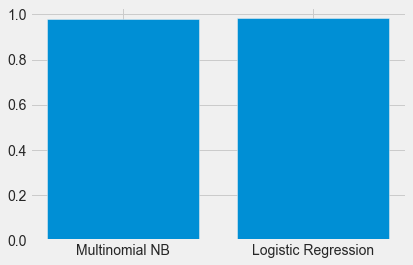

In [102]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2)

models = ['Multinomial NB', 'Logistic Regression']
AUC_scores = [metrics.roc_auc_score(y_test, y_pred_prob_mnb),
              metrics.roc_auc_score(y_test, y_pred_prob_lr)]

plt.bar(x, AUC_scores)
plt.xticks(x, models)

#plt.show(())

print("Multinomial NB AUC score:- ", metrics.roc_auc_score(y_test, y_pred_prob_mnb))
print("Logistic Regression AUC score:- ", metrics.roc_auc_score(y_test, y_pred_prob_lr))